## Analysis and Visualization of 
# Income Disparities around the world

from 1978 - 2007

In [37]:
import pandas as pd
import numpy as np
import cufflinks as cf


%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [38]:
init_notebook_mode(connected=True)

Reading Datafiles from www.gapminder.com

In [142]:

high10 = pd.read_excel('Indicator_Income share held by highest 10%.xlsx', index_col=0)
high20 = pd.read_excel('Indicator_Income share held by highest 20%.xlsx', index_col=0)
sec20 = pd.read_excel('Indicator_Income share held by second 20%.xlsx', index_col=0)
thi20 = pd.read_excel('Indicator_Income share held by third 20%.xlsx', index_col=0)
four20 = pd.read_excel('Indicator_Income share held by fourth 20%.xlsx', index_col=0)
low20 = pd.read_excel('indicator SI_DST_FRST_20.xls.xlsx', index_col=0)
low10 = pd.read_excel('Indicator_Income share held by lowest 10%.xlsx', index_col=0)


num_bill = pd.read_excel('Indicator_number of billionaires.xlsx', index_col=0)
rel_num_bill = pd.read_excel('Indicator_Number of billionaires per 1 million inhabitants.xlsx', index_col=0)
avg_age_bill = pd.read_excel('Indicator_Average age.xlsx', index_col=0)

gini = pd.read_excel('indicator SI_POV_GINI.xls.xlsx', index_col=0)

* mean per country - quartiles    the most unequal, poorest, richest countries of the world 

* histograms

* might have to bin countries together to continents


In [143]:
shigh20 = high20.stack()
ssec20 = sec20.stack()
sthi20 = thi20.stack()
sfour20 = four20.stack()
slow20 = low20.stack()

d = {'%inc_highest20': shigh20, '%inc_second20': ssec20, '%inc_third20': sthi20, '%inc_fourth20': sfour20, '%inc_low20': slow20}
df2 = pd.DataFrame(data=d).reset_index()

In [144]:
df2

,Income share held by highest 20%,level_1,%inc_highest20,%inc_second20,%inc_third20,%inc_fourth20,%inc_low20
0,Albania,1997,37.760000,12.970000,17.420000,23.160000,8.690000
1,Albania,2002,37.090000,13.320000,17.560000,23.010000,9.020000
2,Albania,2005,40.930000,12.160000,16.580000,22.550000,7.780000
3,Algeria,1988,47.180000,10.790000,14.820000,20.670000,6.540000
4,Algeria,1995,42.420000,11.530000,16.310000,22.810000,6.930000
5,Angola,2000,61.860000,5.660000,10.790000,19.690000,2.000000
6,Argentina,1986,49.770000,9.370000,14.370000,21.630000,4.860000
7,Argentina,1992,50.210000,8.940000,14.250000,22.040000,4.560000
8,Argentina,1996,52.920000,8.200000,13.510000,21.470000,3.900000
9,Argentina,1998,53.800000,7.780000,13.290000,21.600000,3.530000


In [40]:
GD = gini.transpose().dropna(1, how='all')
GD_list = list(GD.transpose().index)
GDt = GD.transpose().reset_index()

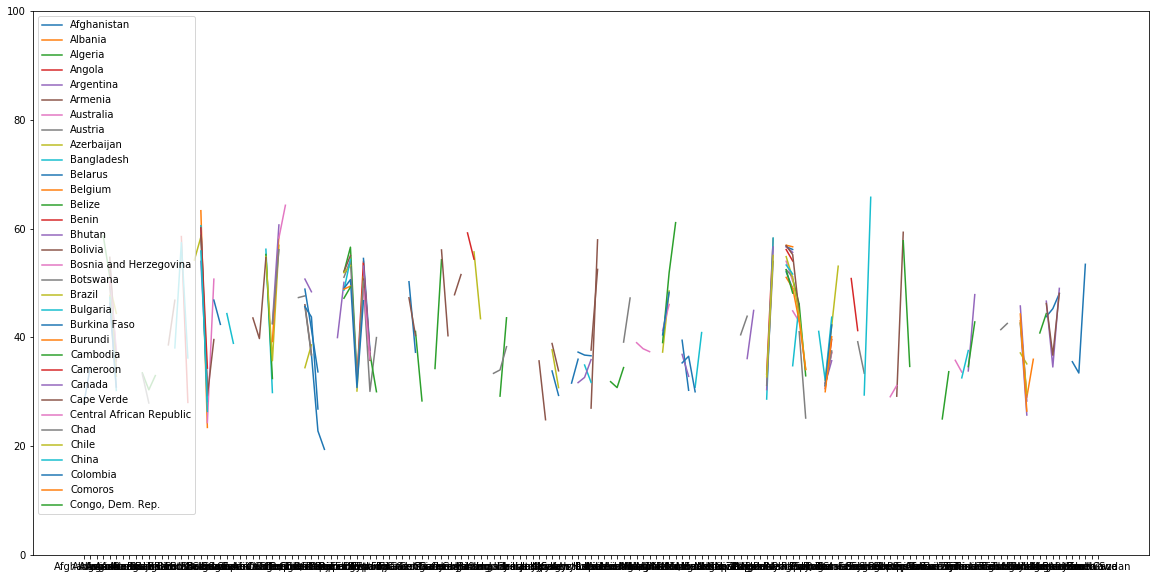

In [5]:
plt.figure(figsize=(20,10))
plt.plot(GD.transpose())
plt.legend(GD_list)
plt.ylim(0, 100)
plt.show()

* group countries by continent
* make movable plot through years

/home/kat/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/home/kat/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



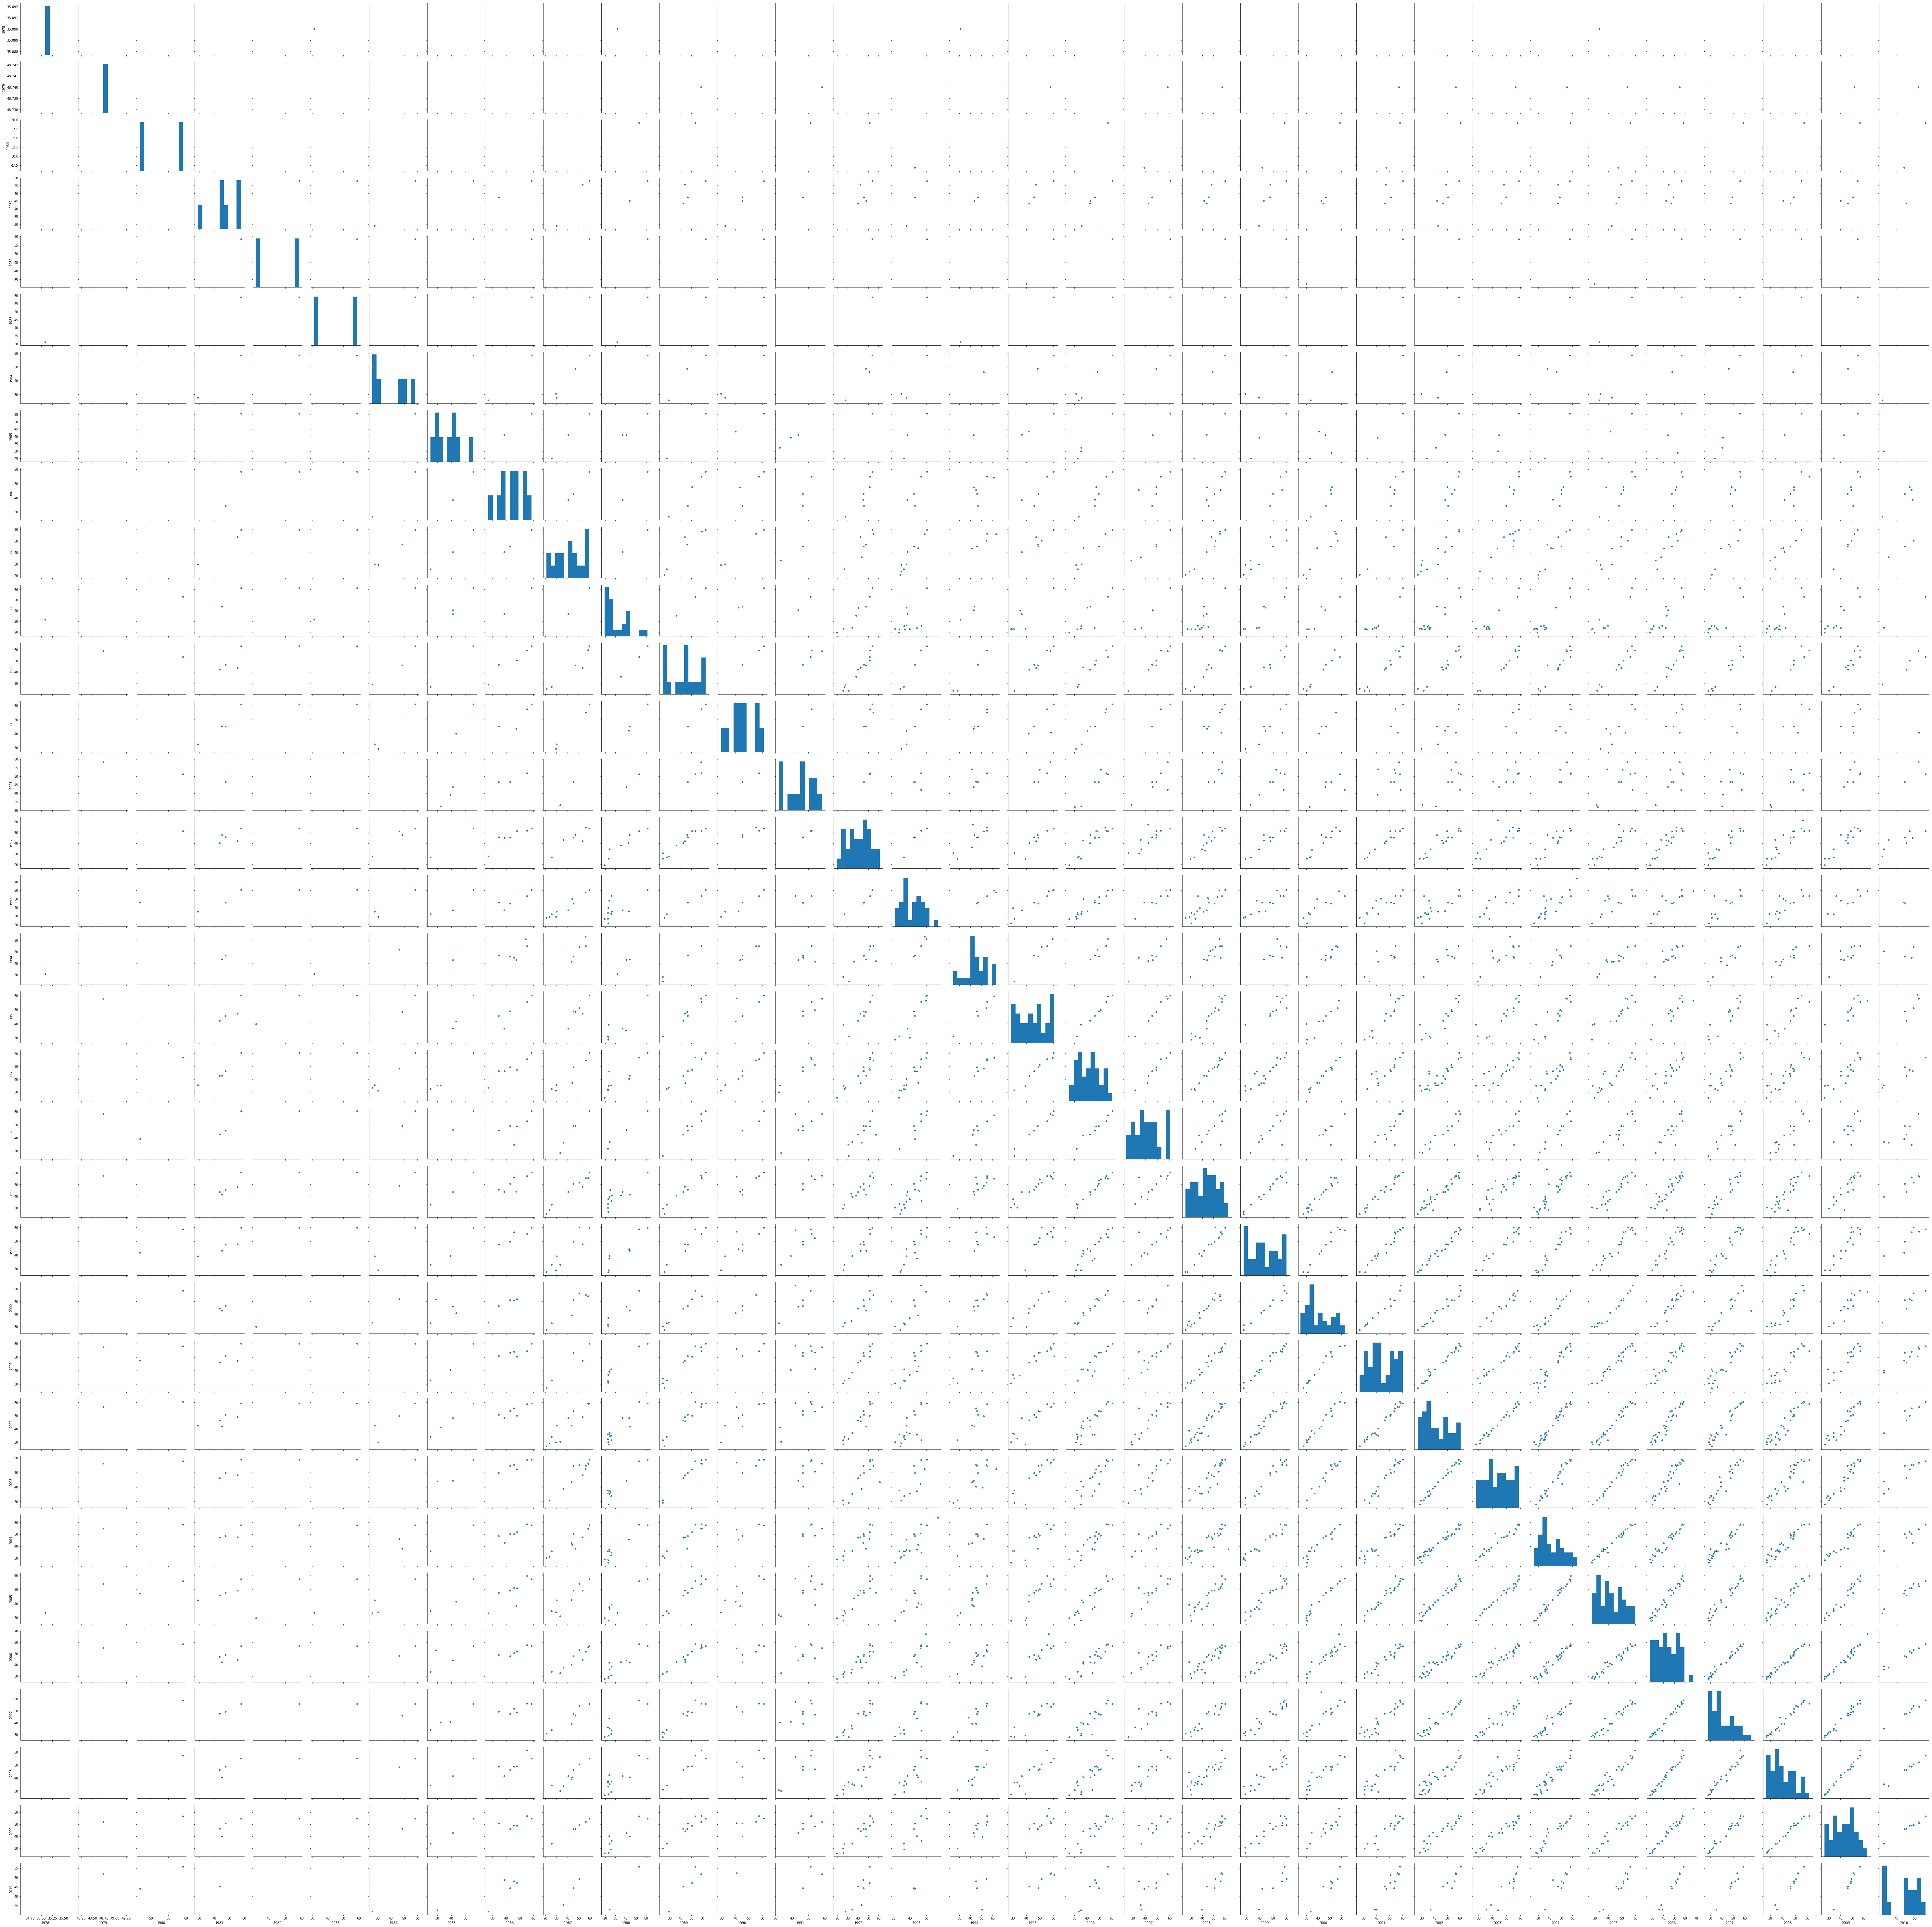

In [5]:
sns.pairplot(GDt)

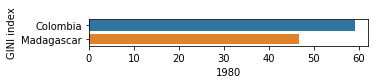

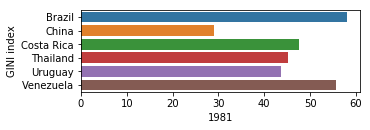

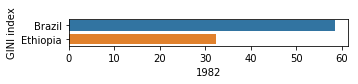

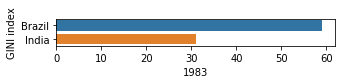

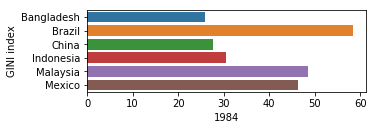

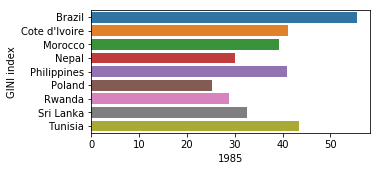

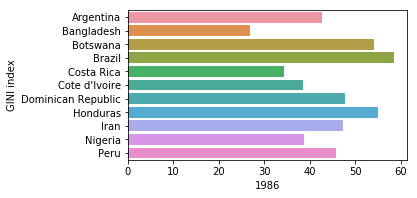

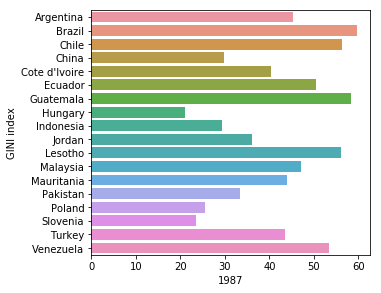

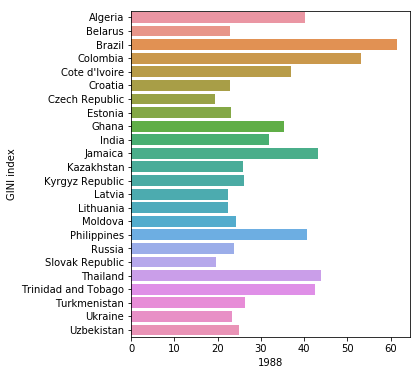

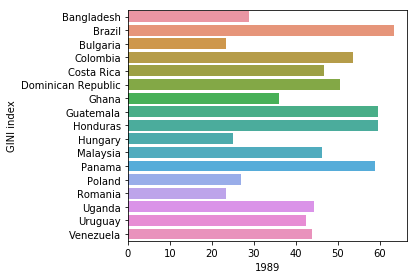

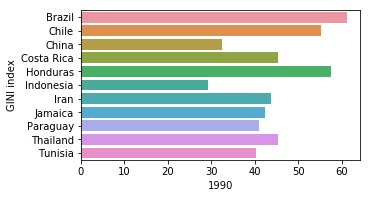

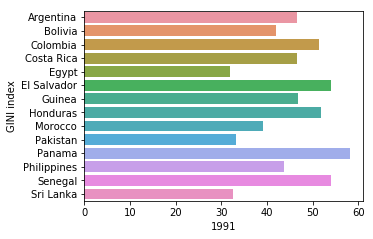

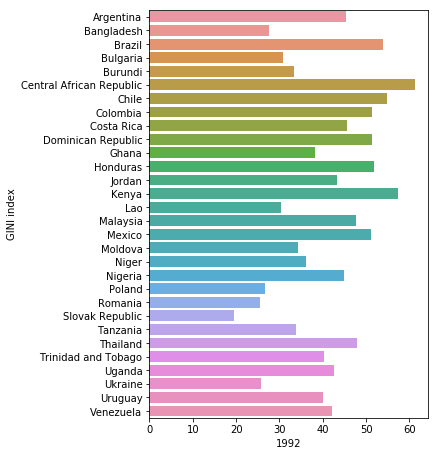

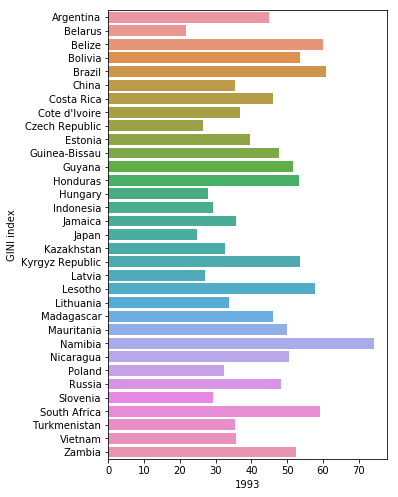

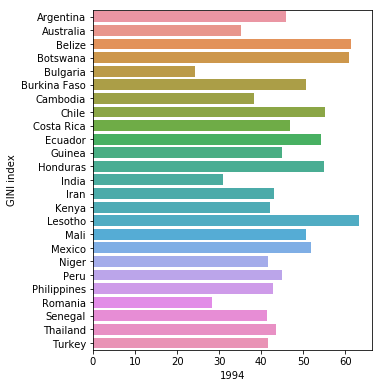

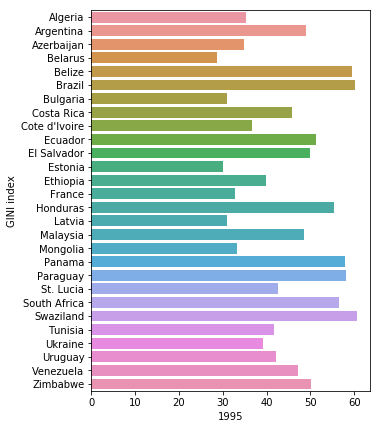

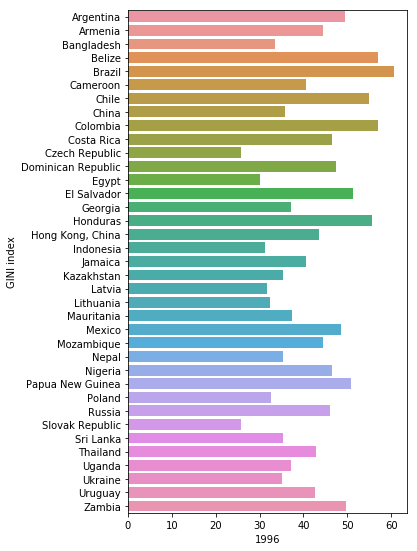

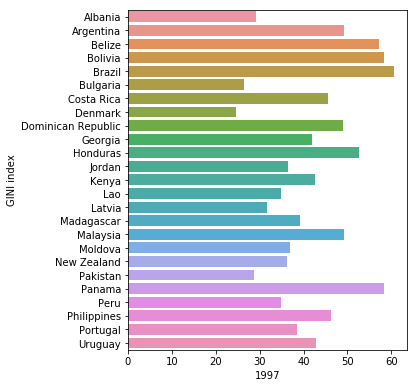

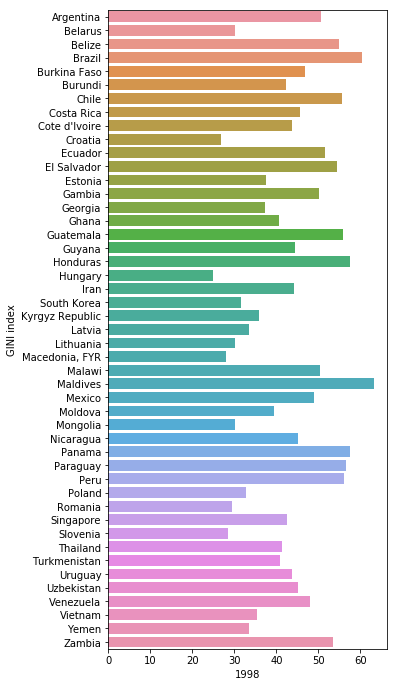

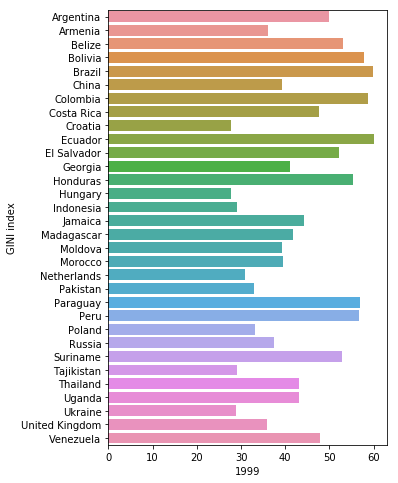

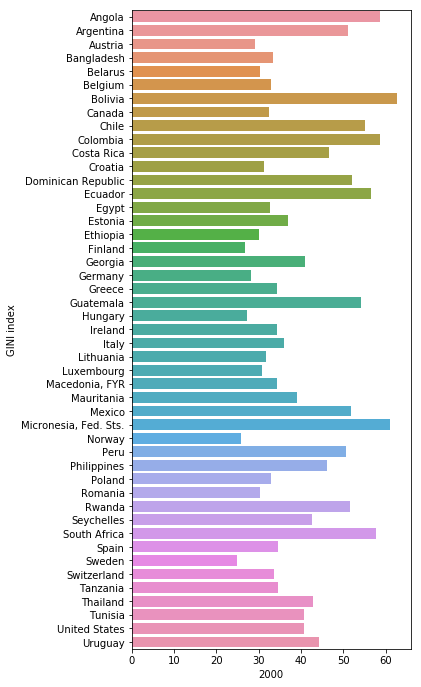

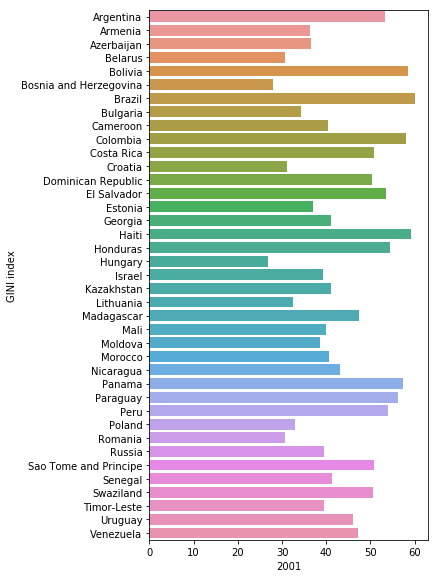

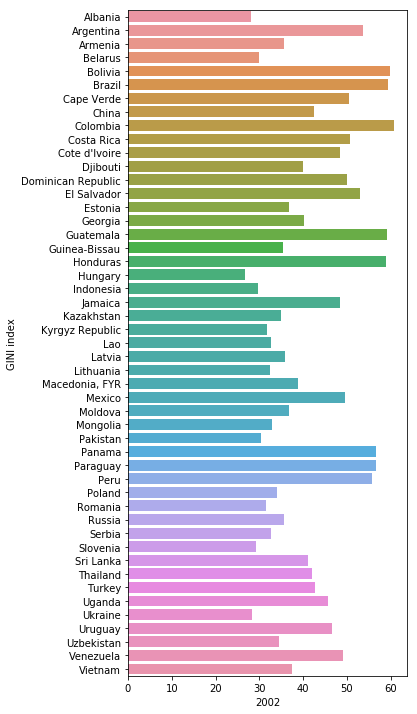

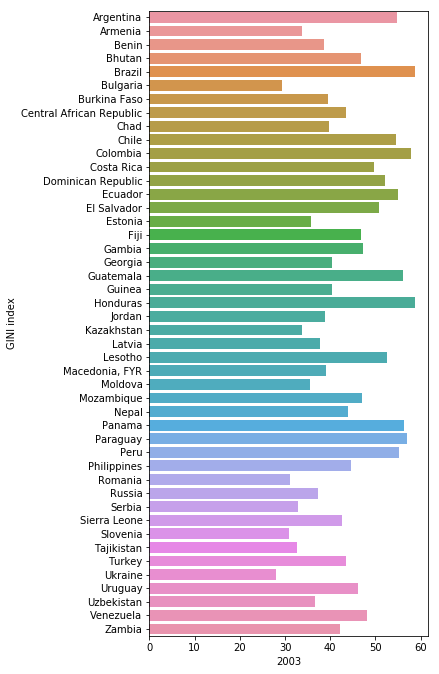

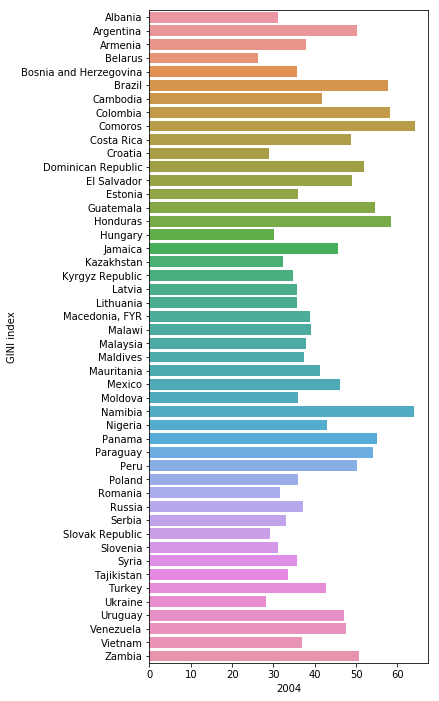

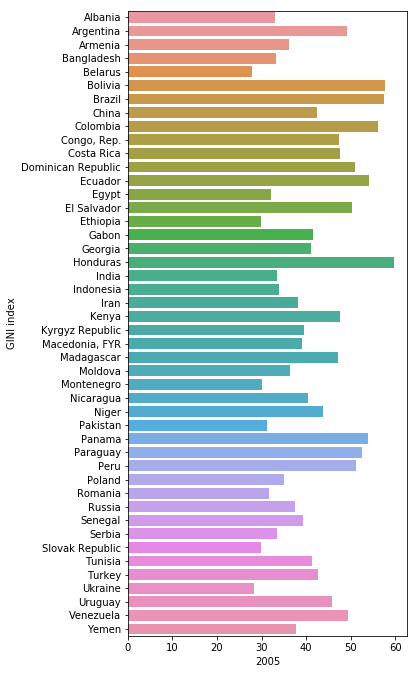

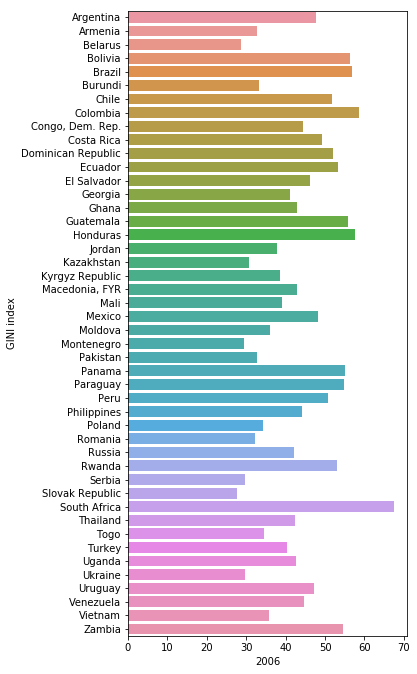

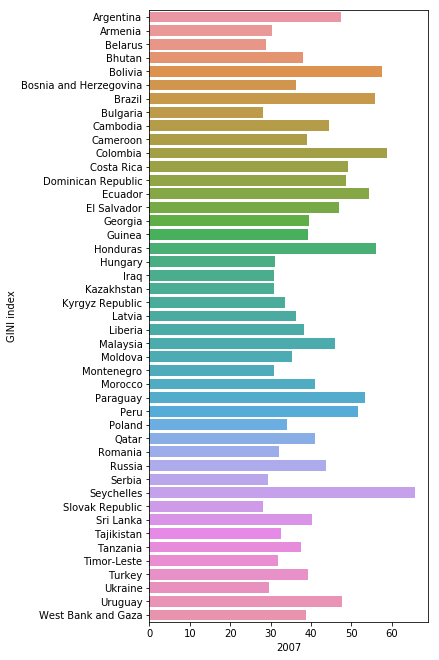

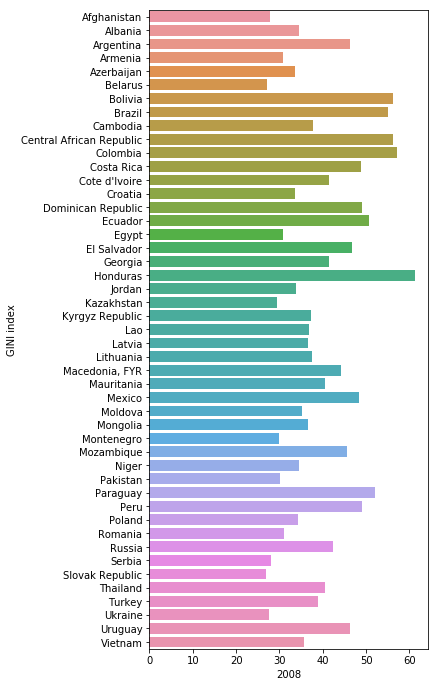

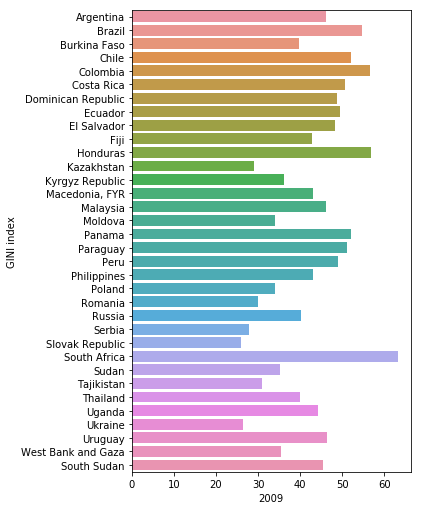

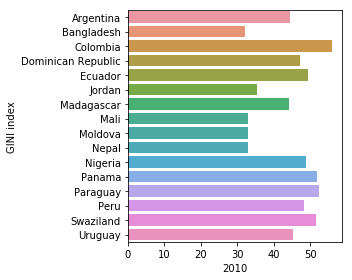

In [8]:
gini_years = GDt.columns[3:]


for year in gini_years:
    a = GDt[[year, 'GINI index']].dropna()
    c = len(a) / 4
    plt.subplots(figsize=(5,c), sharey=True)
    sns.barplot(x=year, y='GINI index', data=a)
    
plt.tight_layout()

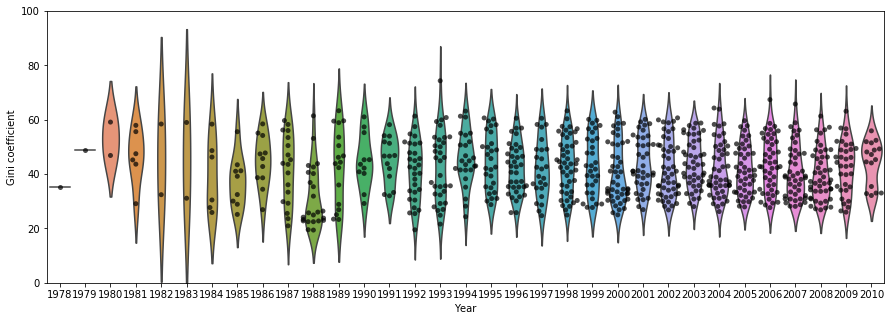

In [9]:
plt.figure(figsize=(15,5))
sns.violinplot(data=GDt, inner=None)
sns.swarmplot(data=GDt, color='k', alpha=0.7)
plt.ylim(0,100)
plt.ylabel('Gini coefficient')
plt.xlabel('Year')
plt.show()

In [41]:
gini_countries = list(GDt['GINI index'])
GDr = GD.reset_index()
l = pd.Series([float(i) for i in GDr['index'].values])

GDr = GDr.replace(GDr['index'], l).set_index('index')
GDt = GDr.transpose().reset_index()

In [42]:
year_value = []
ann_text = []
for i in range(157):
    values = GDt.loc[i].dropna()
    years = GDt.loc[i].dropna().index
    for value in values[1:]:
        for year in years[1:]:
            year_value.append([year, value])
            ann_text.append(values[0])

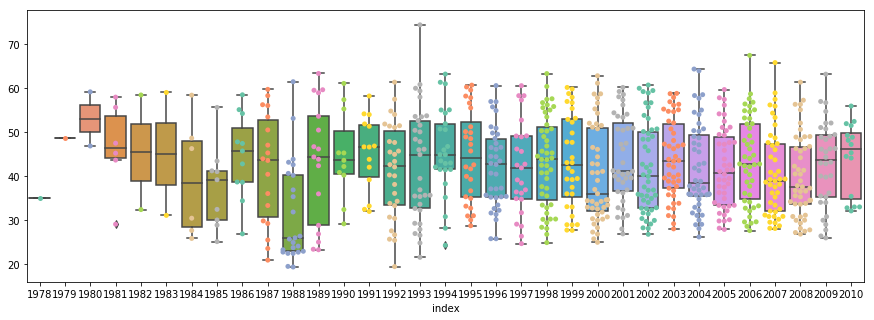

In [43]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot()
ax2 = fig.add_subplot()

box = sns.boxplot(data=GDt, ax=ax1)
swarm = sns.swarmplot(data=GDt, palette='Set2', ax=ax2)
plt.show()

Text(0.5, 1.0, 'standart deviation per year')

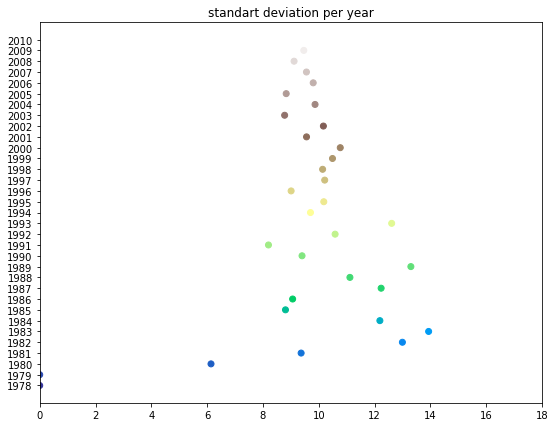

In [44]:
std = np.std(GDt)
labels = std.index[::2]
year_GD = GDt.set_index('GINI index').transpose().reset_index()

plt.figure(figsize=(9,7))
plt.scatter(std, year_GD['index'], cmap='terrain', c=range(33))
plt.xlim(0,18)
plt.title('standart deviation per year')

In [45]:
cf.go_offline()

In [58]:
std = pd.DataFrame(std, columns=['val']).reset_index()
cf.colors.scales()

Kind of chart

                               scatter
                               bar
                               box
                               spread
                               ratio
                               heatmap
                               surface
                               histogram
                               bubble
                               bubble3d
                               scatter3d       
                               scattergeo
                               ohlc
                               candle
                               pie
                               choroplet 

In [85]:
std.iplot(kind='choroplet')

PlotlyEmptyDataError: Empty data list found. Make sure that you populated the list of data objects you're sending and try again.
Questions? Visit support.plot.ly

In [71]:
GD = GDt.set_index('GINI index')
#GDt.hist()
#sns.violinplot(GD)


In [72]:
#getting aquainted with plotly

import plotly.graph_objs as go

fig = go.FigureWidget()
fig.add_scatter(y=[2, 1, 4, 3])
fig.add_bar(y=[1, 4, 3, 2])
fig.layout.title = 'Hello FigureWidget'
fig

FigureWidget({
    'data': [{'type': 'scatter', 'uid': '9ecde9a2-4f09-4337-a72b-4809efad4473', 'y': [2, 1, 4, …